In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import pandas as pd
import matplotlib
from matplotlib import patches
from sympy import *
import datetime
from functools import reduce
from sklearn.datasets import make_spd_matrix, make_sparse_spd_matrix
import scipy

from scipy.optimize import minimize

import sys
import os

import itertools
from scipy.special import binom
from scipy.stats import ortho_group

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import sklearn.metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

from itertools import cycle

In [2]:
def myrepr(x):
    return repr(round(x, 2)).replace('.',',') if isinstance(x, float) else repr(x)

In [3]:
from logreg_functions import *
from sigmoid_functions import *

In [98]:
upd_option_ar = ["one-point", "two-point"]
step_type_ar = ["var-step", "fix-step"]
#loss_func_ar = ["log-reg", "sigmoid"]
loss_func_ar = ["log-reg"]
#loss_func_ar = ["sigmoid"]
gamma_0_ar = [0.1, 0.5, 1, 2, 5, 10, 20]

for i, (upd_option, loss_func, step_type, gamma_0) in enumerate(itertools.product (upd_option_ar, loss_func_ar, step_type_ar, gamma_0_ar)):
    print ("mpirun -n 4 python3 sign_sgd_majority.py --upd_option {0} --loss_func {1} --step_type {2} --max_it 500 --gamma_0 {3} &&".format(upd_option,
                                                                                                                                            loss_func,
                                                                                                                                              step_type,
                                                                                                                                          gamma_0))


mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 500 --gamma_0 0.1 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 500 --gamma_0 0.5 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 500 --gamma_0 1 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 500 --gamma_0 2 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 500 --gamma_0 5 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 500 --gamma_0 10 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 500 --gamma_0 20 &&
mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point

bash commands

python3 generate_data.py --n_workers 3

mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 100 --gamma_0 1



firstly lets find f_min of log-reg mushrooms

## sign_sgd_one_point_majority_log-reg_var

load all existent data

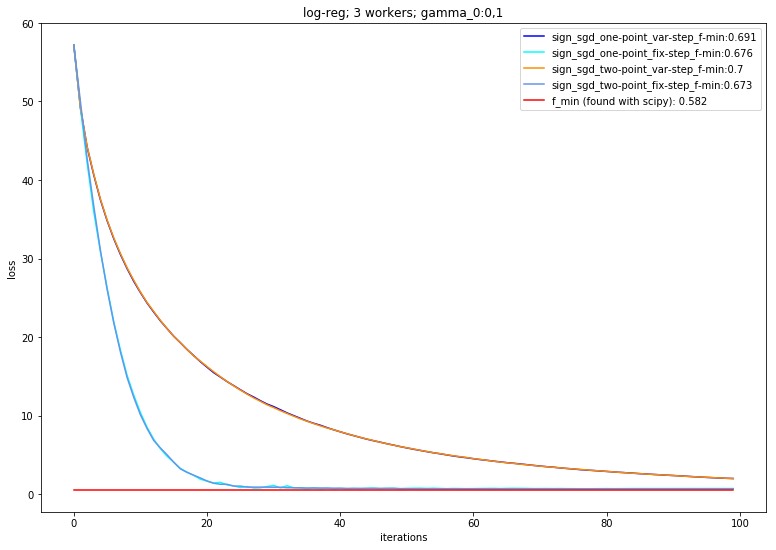

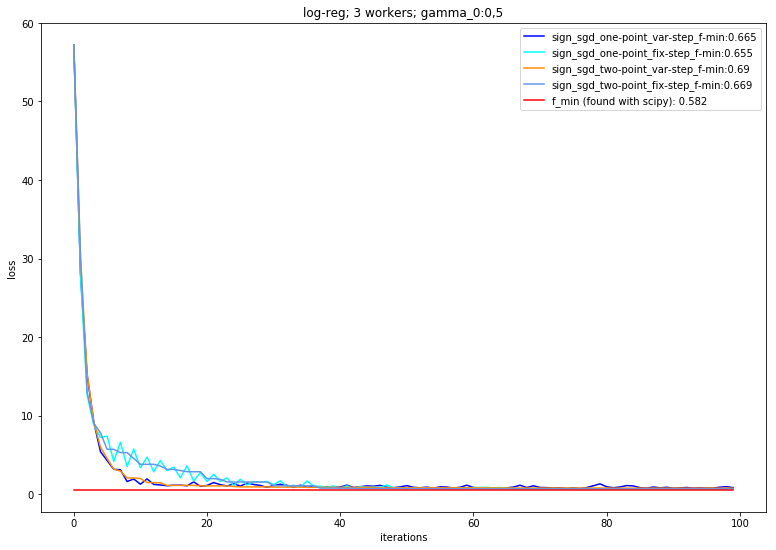

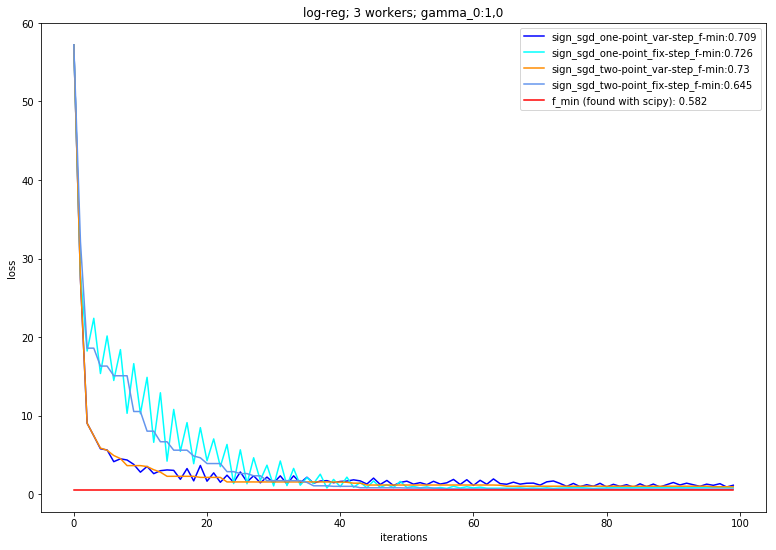

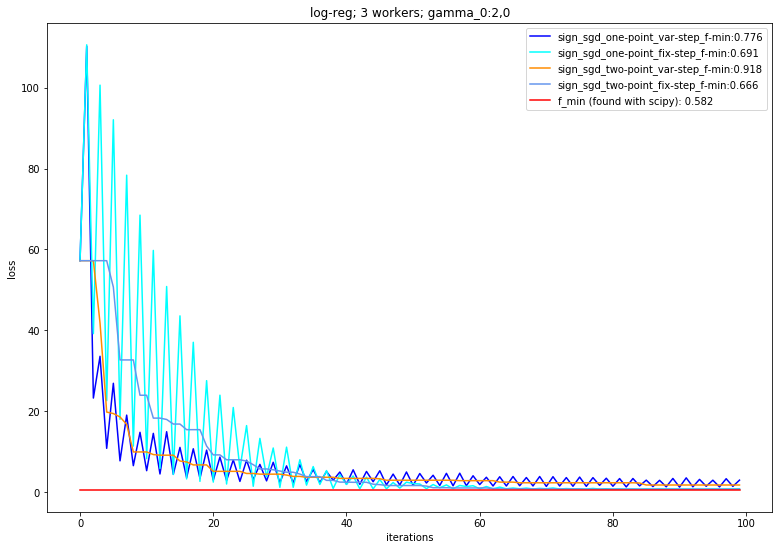

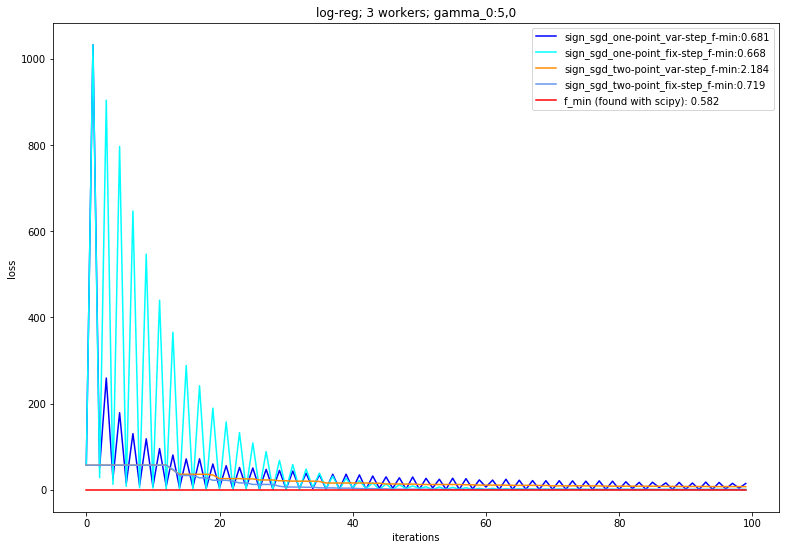

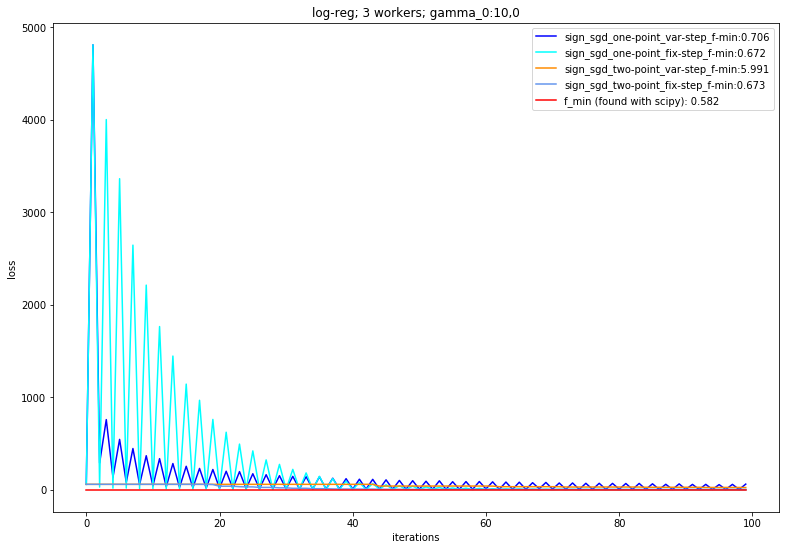

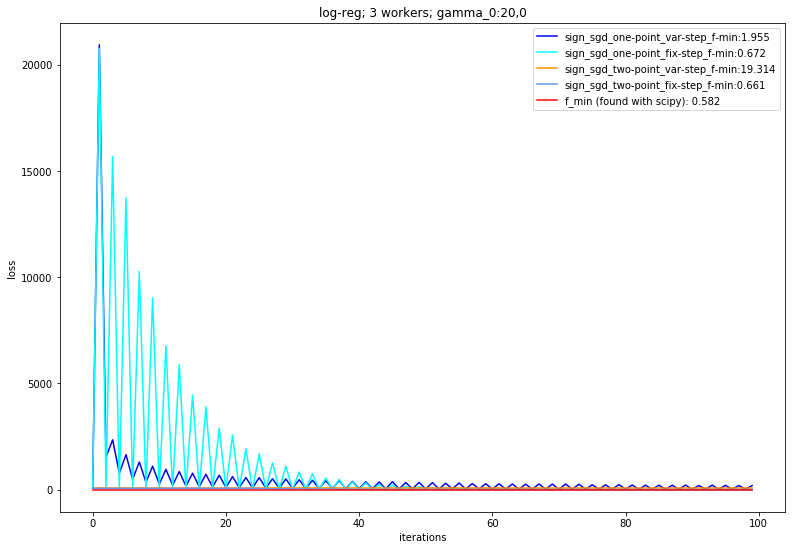

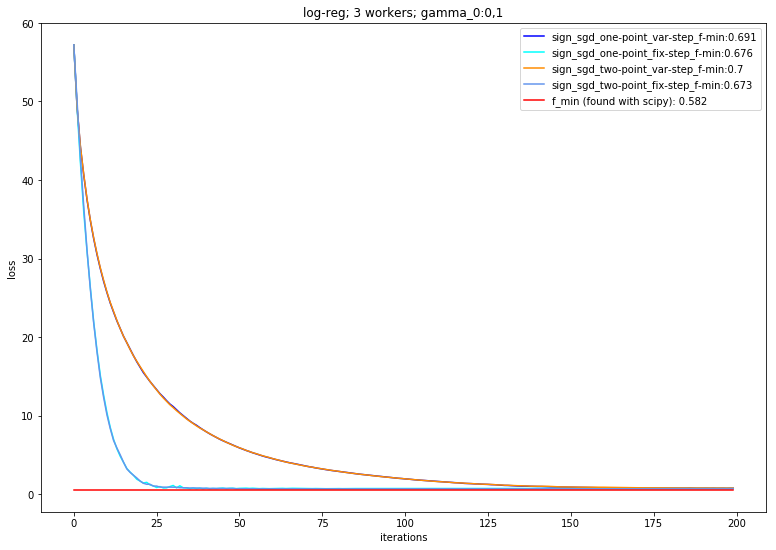

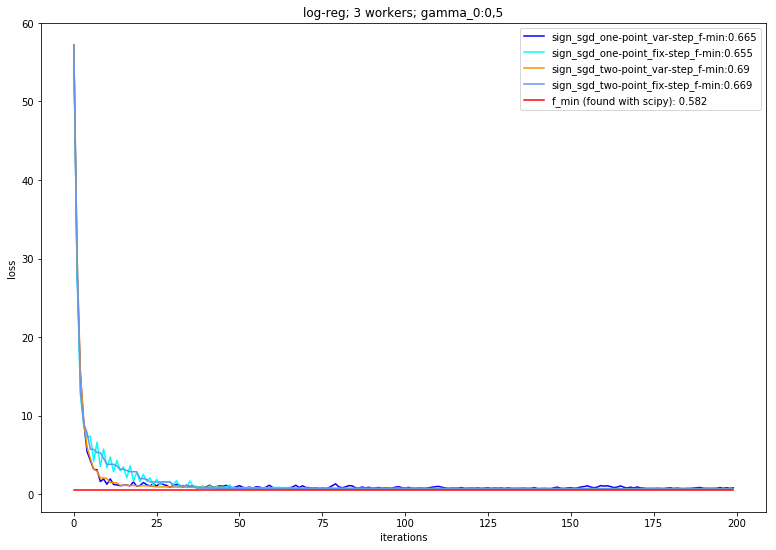

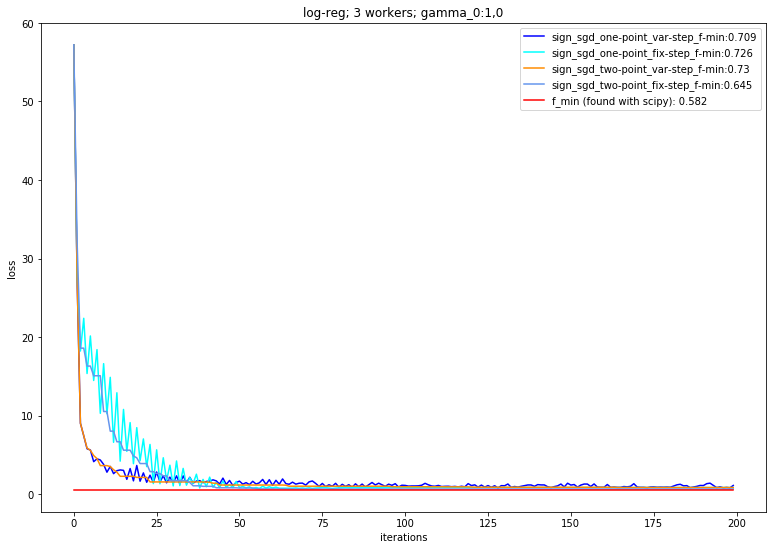

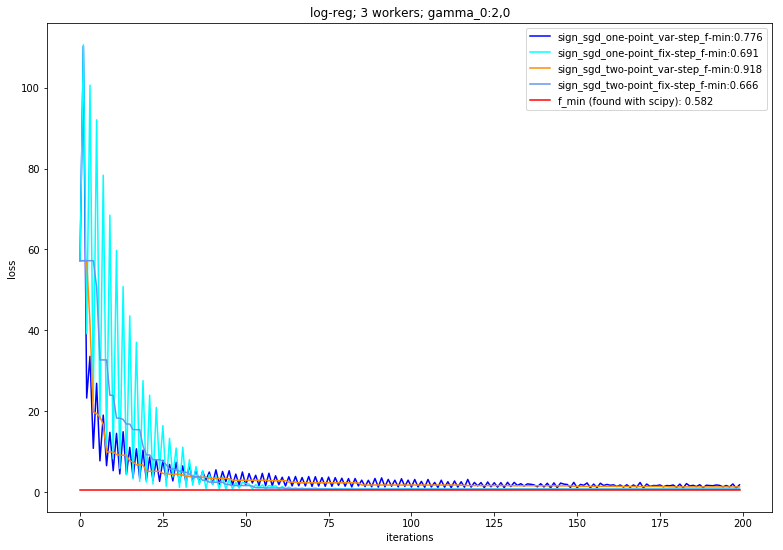

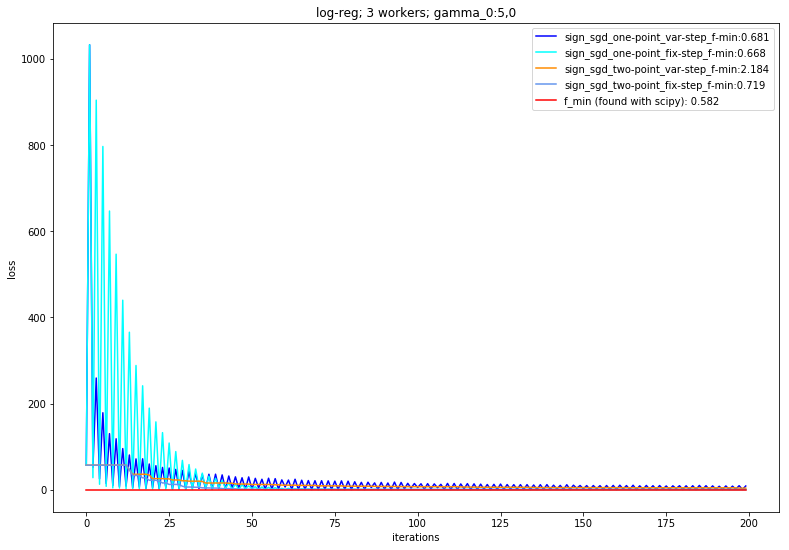

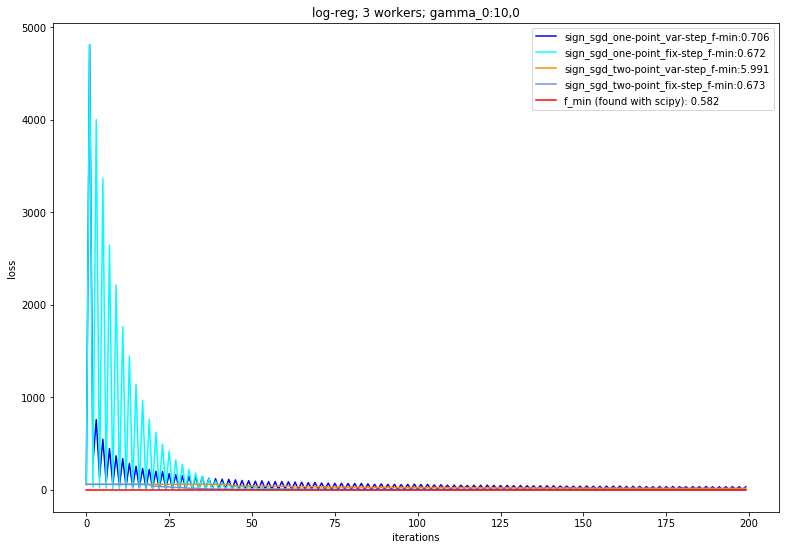

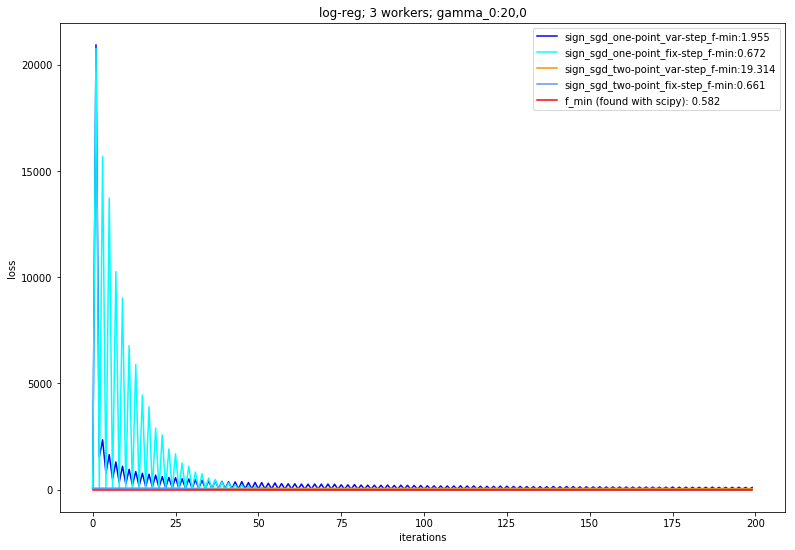

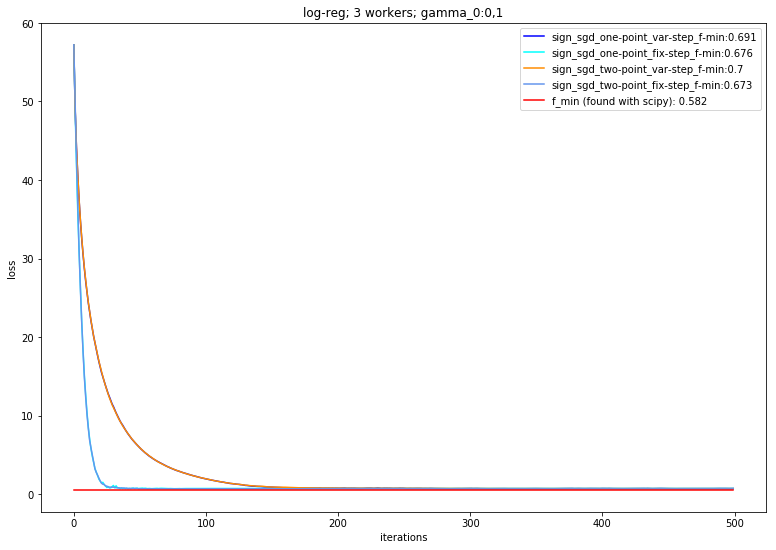

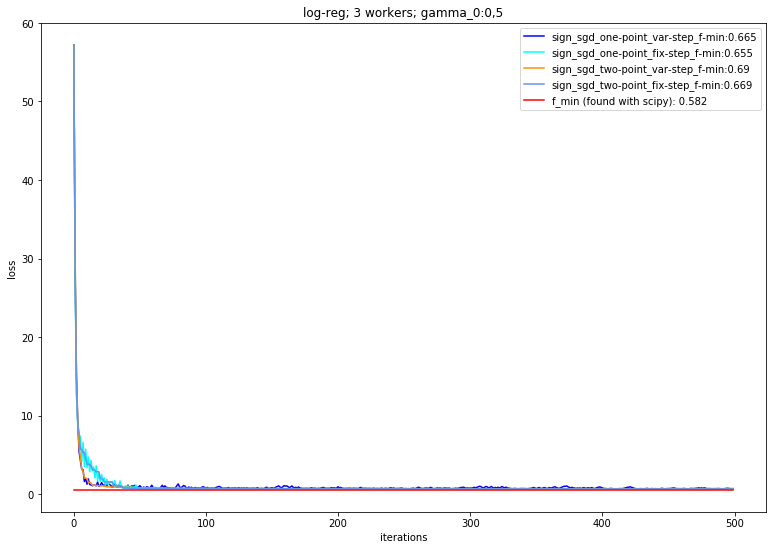

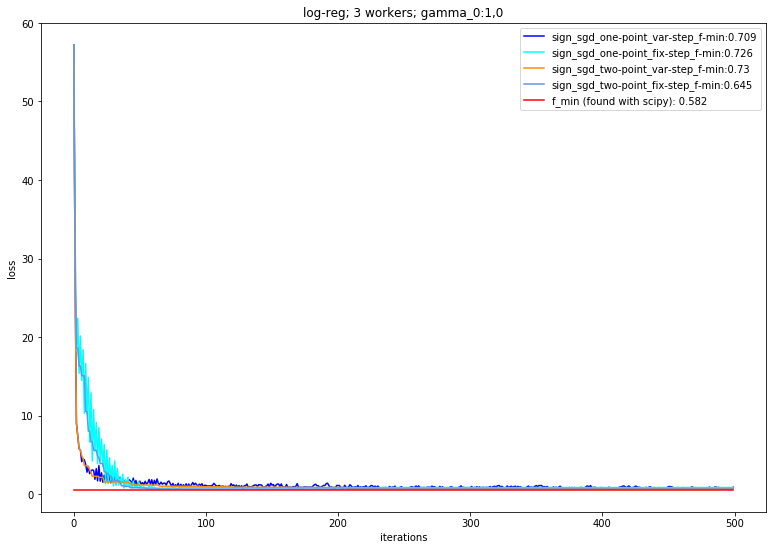

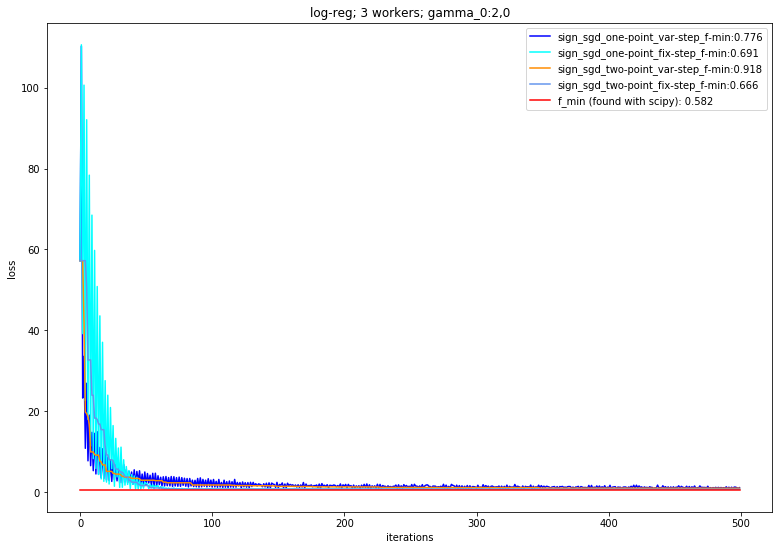

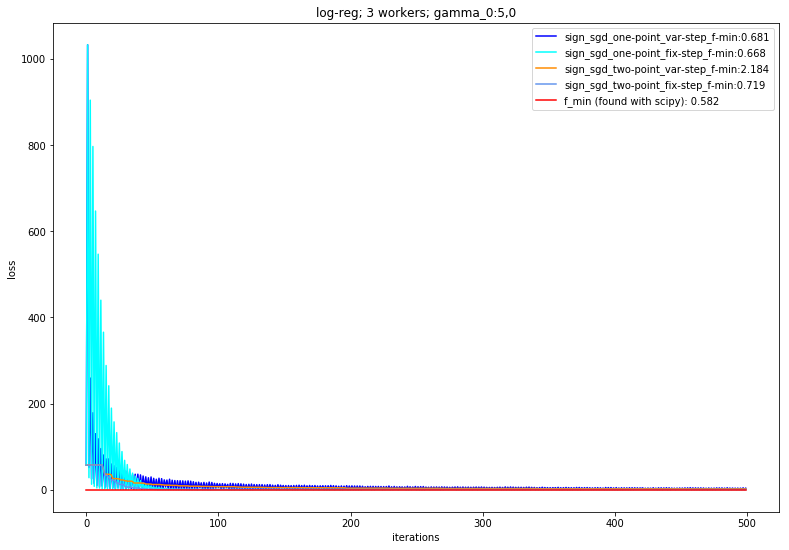

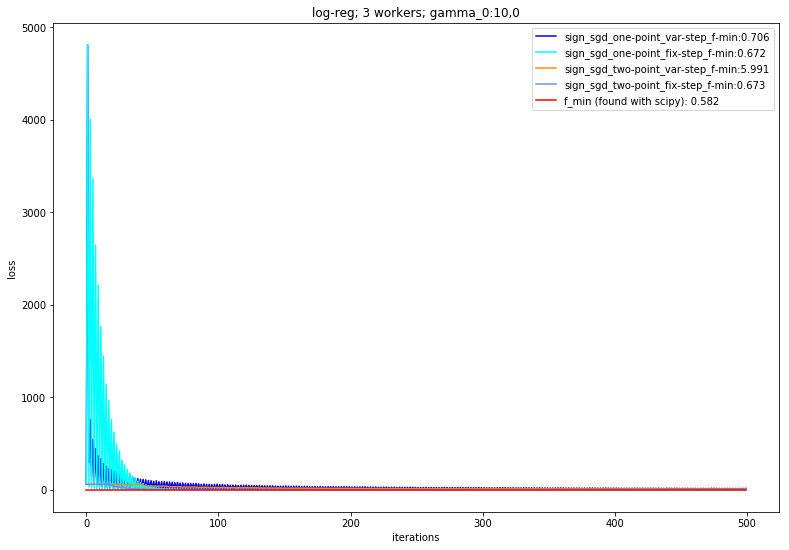

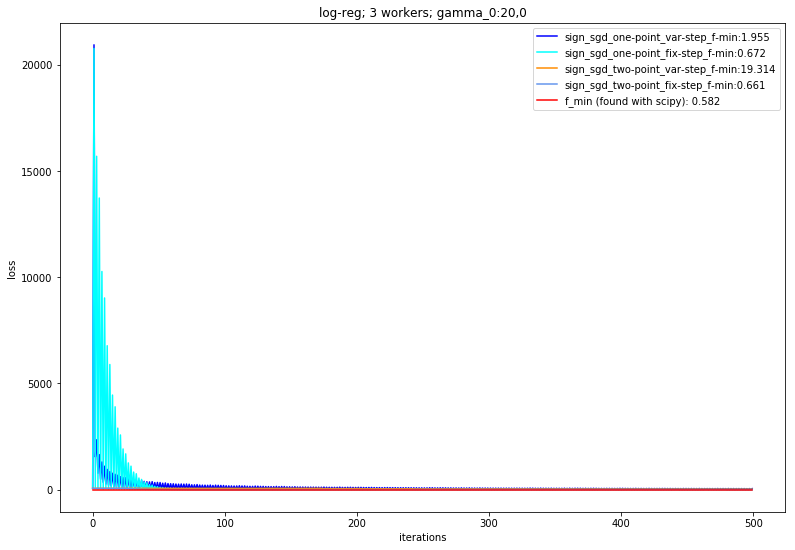

In [116]:
#upload whole data 
project_path = "/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/"

experiment_name_short = "sign_sgd"
experiment_name_ar = ["sign_sgd_majority"]
dataset_ar = ["mushrooms"]
loss_func_ar = ["log-reg", "sigmoid"]
upd_option_ar = ["one-point", "two-point"]
step_type_ar = ["var-step", "fix-step"]
n_workers_ar = [3]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]
batch_ar = [1]

clf_coef_ar = {}
X_train_ar = {}
y_train_ar = {}
la_ar = {}
f_min_ar = {}
info_num_ar = {}
loss_ar = {}
time_ar = {}
its_ar = {}
w_ar = {}
label_ar = {}

for experiment_name, dataset, loss_func, upd_option, step_type, n_workers, gamma_0, batch in \
itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar, gamma_0_ar, batch_ar):
    experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)
    
    id_str = "{0}_{1}".format(dataset, experiment)#####
    id_func = "{0}_{1}".format(dataset, loss_func)#####
    id_dataset = "{0}_{1}".format(dataset, n_workers)#####
    id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)
    
    logs_path = project_path + "logs_{0}_{1}/".format(dataset, experiment)
    data_path = project_path + "data_{0}_{1}/".format(dataset, n_workers)
    plot_path = project_path + "plot_{0}_{1}/".format(dataset, n_workers)
    
    if os.path.exists(plot_path) == False:
        os.mkdir(plot_path)
    
    if os.path.isfile(data_path + 'X.npy'):
        X_train_ar[id_dataset] = np.load(data_path + 'X.npy')
    if os.path.isfile(data_path + 'y.npy'):
        y_train_ar[id_dataset] = np.load(data_path + 'y.npy')
    
    if os.path.isfile(data_path + 'data_info.npy'): 
        data_info = np.load(data_path + 'data_info.npy')
        N, L = data_info[:2]
        
        if os.path.isfile(data_path + "{0}_clf_coef.npy".format(loss_func)):
            clf_coef_ar[id_func] = np.load(data_path + "{0}_clf_coef.npy".format(loss_func))
            
            if os.path.isfile(data_path + "{0}_f_min.npy".format(loss_func)):
                f_min_ar[id_func] = float (np.load(data_path + "{0}_f_min.npy".format(loss_func)))
                #print(f_min_ar[id_func], type(f_min_ar[id_func]))
    
    
    
    if os.path.isfile(logs_path + 'info_number' + "_" + experiment + ".npy"): 
        info_num_ar[id_str]    = np.load(logs_path + 'info_number' + "_" + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'loss' + "_" + experiment + ".npy"):
        loss_ar[id_str] = np.load(logs_path + 'loss' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'time' + "_" + experiment + ".npy"):
        time_ar[id_str]        = np.load(logs_path + 'time' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'iteration' + "_" + experiment + ".npy"):
        its_ar[id_str] = np.load(logs_path + 'iteration' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'iterates' + "_" + experiment + ".npy"):
        w_ar[id_str] = np.load(logs_path + 'iterates' + '_' + experiment + ".npy")
        
    label_ar[id_label] = id_label

    
#what dow you want to show in the plot   

experiment_name_ar = ["sign_sgd_majority"]
dataset_ar = ["mushrooms"]

loss_func_ar = ["log-reg"]
#loss_func_ar = ["sigmoid"]

upd_option_ar = ["one-point", "two-point"]
step_type_ar = ["var-step", "fix-step"]
n_workers_ar = [3]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]
batch_ar = [1]
colors = ['blue', 'aqua', 'darkorange', 'cornflowerblue', 'red']

n_iter_ar = [100,200,500]
for n_iter in n_iter_ar:
    #plt.plot(its_ar[:np.argmin (loss_ar)], loss_ar[:np.argmin (loss_ar)], color=color, label=str(label_ar[0]))
    for gamma_0 in  gamma_0_ar:
        for i, (experiment_name, dataset, loss_func, upd_option, step_type, n_workers, batch) in \
        enumerate(itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar,batch_ar)):
            experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)

            id_str = "{0}_{1}".format(dataset, experiment)
            id_func = "{0}_{1}".format(dataset, loss_func)
            id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)

            if  ((id_str in its_ar) and id_str in loss_ar):
                if n_iter is None:
                    plt.plot(its_ar[id_str], loss_ar[id_str], color=colors[i], label= label_ar[id_label] + "_f-min:{0}".format(round(np.min(loss_ar[id_str]), 3))  )
                else:
                    plt.plot(its_ar[id_str][:n_iter], loss_ar[id_str][:n_iter], color=colors[i], label= label_ar[id_label] + "_f-min:{0}".format(round(np.min(loss_ar[id_str]), 3))  )

        if ((id_str in its_ar) and id_func in f_min_ar):
            if n_iter is None:
                plt.plot(its_ar[id_str], ([f_min_ar[id_func]]*its_ar[id_str].shape[0]), color='red', label="f_min (found with scipy): {0}".format(round(f_min_ar[id_func], 3)))
            else:
                plt.plot(its_ar[id_str][:n_iter], ([f_min_ar[id_func]]*its_ar[id_str].shape[0])[:n_iter], color='red', label="f_min (found with scipy): {0}".format(round(f_min_ar[id_func], 3)))

        plt.rcParams["figure.figsize"] = [13,9]
        plt.ylabel('loss')
        plt.xlabel('iterations')
        #plt.yscale('log')

        title = '{0}; {1} workers; gamma_0:{2}'.format( loss_func, n_workers, myrepr(gamma_0) )
        plt.title(title)
        plt.legend(loc="upper right")
        if n_iter is None:
            plt.savefig(plot_path + "{0}; {1} workers; {2} gamma_0; {3} n_iter .pdf".format(loss_func, n_workers, myrepr(gamma_0), its_ar[id_str].shape[0]))
        else:
            plt.savefig(plot_path + "{0}; {1} workers; {2} gamma_0; {3} n_iter .pdf".format(loss_func, n_workers, myrepr(gamma_0), n_iter))
        plt.show()


#plt.plot()

In [113]:
f_min_ar

{'mushrooms_log-reg': 0.5824271318124145,
 'mushrooms_sigmoid': 1.934451454069857}

In [76]:
f_min_ar[id_func]

KeyError: 'mushrooms_log-reg'

# merging plots 

In [118]:
import glob
from PyPDF2 import PdfFileMerger
 
def merger(output_path, input_paths):
    pdf_merger = PdfFileMerger()
    file_handles = []
 
    for path in input_paths:
        pdf_merger.append(path)
 
    with open(output_path, 'wb') as fileobj:
        pdf_merger.write(fileobj)

n_workers_ar = [3]
gamma_0_ar = [0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]
dataset_ar = ["mushrooms"]
loss_func_ar = ["log-reg"]
#loss_func_ar = ["sigmoid"]

n_iter_ar = [100, 200,500]

project_path = "/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/"
for i, (dataset, loss_func, n_workers, gamma_0) in \
    enumerate(itertools.product ( dataset_ar, loss_func_ar, n_workers_ar, gamma_0_ar)):
        plot_path = project_path + "plot_{0}_{1}/".format(dataset, n_workers)
        paths= [plot_path + "{0}; {1} workers; {2} gamma_0; {3} n_iter .pdf".format(loss_func, n_workers, myrepr(gamma_0), n_iter) for n_iter in n_iter_ar]
        merger(plot_path + "{0}; {1} workers; {2} gamma_0.pdf".format(loss_func, n_workers, myrepr(gamma_0)), paths)
        

## Auxilary computations

In [84]:
from logreg_functions import *
from sigmoid_functions import *
data_name = "mushrooms.txt"

user_dir = os.path.expanduser('~/')
SCRIPTS_PATH = '/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/data/'
DATA_PATH = '/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/data/'


project_path = "/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/"
data_path = project_path + "data_{0}_{1}/".format(dataset, n_workers)

loss_func = "sigmoid"

Xs = []
ys = []

data, labels = load_svmlight_file(DATA_PATH + data_name)

enc_labels = labels.copy()
enc_labels[enc_labels==1] = -1
enc_labels[enc_labels==2] = 1
data_dense = data.todense()

train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(data_dense, enc_labels, test_size=0.2, random_state=0)

X = np.array(train_feature_matrix)
y = np.array(train_labels)

#la = np.mean(np.diag(X.T @ X))

la = 1

if loss_func == "log-reg":
    f =    lambda w: logreg_loss(w, X, y,la)
    grad = lambda w: logreg_grad(w, X, y,la)

if loss_func == "sigmoid":
    f =    lambda w: reg_bin_clf_loss(w, X, y)
    grad = lambda w: reg_bin_clf_grad(w, X, y)


d = X.shape[1]
res_grid = {}
w0 = np.random.normal(loc=0.0, scale=1.0, size=d)
solvers = ["Nelder-Mead",
"Powell",
"CG",
"BFGS",
"Newton-CG",
"L-BFGS-B",
"TNC",
"COBYLA",
"SLSQP"]
for solver in solvers:
    result = minimize (fun=f, x0=w0, jac=grad, method=solver,options={"maxiter":10000})
    print(solver)
    res_grid[solver] = result.fun 

data_len = len(labels)

train_data_len = X.shape[0]



Nelder-Mead


Powell
CG
BFGS
Newton-CG
L-BFGS-B
TNC


COBYLA
SLSQP
trust-constr


ValueError: Hessian is required for dogleg minimization

In [102]:
d = 5
a = np.array([1895]*d) + np.random.normal(loc=0, scale=0.5, size=d)
print(a)
print(a[:d].std())

[1894.89629931 1895.13001349 1894.49979813 1894.3436587  1895.07719753]
0.3139512640177138


In [85]:
res_grid

{'Nelder-Mead': 1.934451454069857,
 'Powell': 1.934451454069857,
 'CG': 6.422467219435686,
 'BFGS': 6.422467219435686,
 'Newton-CG': 6.422467219435686,
 'L-BFGS-B': 6.422467219435686,
 'TNC': 6.422467219435686,
 'COBYLA': 1.934451454069857,
 'SLSQP': 6.422467219549238,
 'trust-constr': 6.422467219435686}

In [80]:
#log-reg
res_grid

{'Nelder-Mead': 32.528987793938114,
 'Powell': 0.5824233137592607,
 'CG': 0.6168658324213048,
 'BFGS': 0.6006605793841331,
 'Newton-CG': 0.598678909404725,
 'L-BFGS-B': 0.6015035605601542,
 'TNC': 0.6015325686907634,
 'COBYLA': 0.5824157183914129,
 'SLSQP': 0.5953829078907655,
 'trust-constr': 0.6007829975143338}